<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Changed by Nov05 on 2019-05-30
# module4-makefeatures/

In [75]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.4MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('drive')
!ls 'drive/My Drive/' # test the drive

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
'Colab Notebooks'   data  'Lambda School'


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import re
import calendar
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# check pandas version
pd.__version__

'0.23.4'

In [0]:
# # save the data frame to .csv file on Google drive
filepath = 'drive/My Drive/data/LoanStats_2018Q4_dropped.csv'
# my_data.to_csv(filepath)

# read csv from google drive to data frame
my_data = pd.read_csv(filepath)

In [6]:
# check my_data
my_data.head(1)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,term_1,int_rate_1,emp_title_1,emp_title_manager,issue_d_1,load_status_is_great,last_pymnt_d_month,last_pymnt_d_year,revol_util_1
0,0,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,14.0,0.0,9082.0,38%,23.0,w,9279.39,9279.39,964.08,964.08,720.61,243.47,0.0,0.0,0.0,Apr-2019,324.23,Apr-2019,Apr-2019,0.0,1.0,Individual,0.0,671.0,246828.0,1.0,3.0,2.0,3.0,1.0,48552.0,62.0,1.0,3.0,4923.0,46.0,23900.0,2.0,7.0,1.0,7.0,17631.0,11897.0,43.1,0.0,0.0,158.0,275.0,11.0,1.0,1.0,11.0,11.0,0.0,3.0,4.0,7.0,7.0,10.0,9.0,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,N,N,36,10.33,Other,0,2018-12-01,True,4,2019,38.0


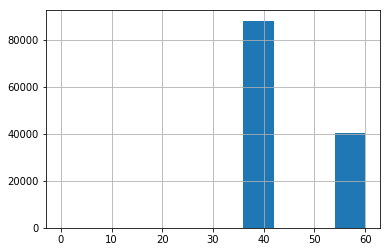

In [0]:
my_data['term_1'].hist();

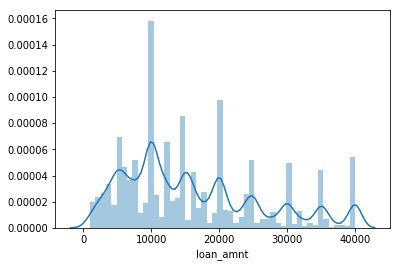

In [0]:
sns.distplot(my_data.loan_amnt.dropna());

In [8]:
my_data.shape

(128414, 111)

In [38]:
subset_1 = my_data[['loan_amnt', 'int_rate_1', 'funded_amnt', 'term_1', 'emp_title_1']].dropna()
subset_1.shape

(128412, 5)

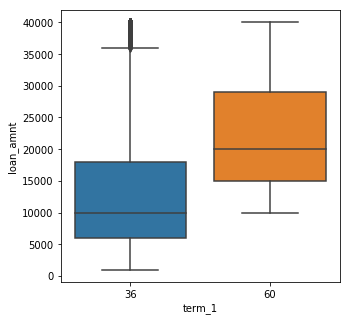

In [41]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='term_1', y='loan_amnt', data=subset_1);

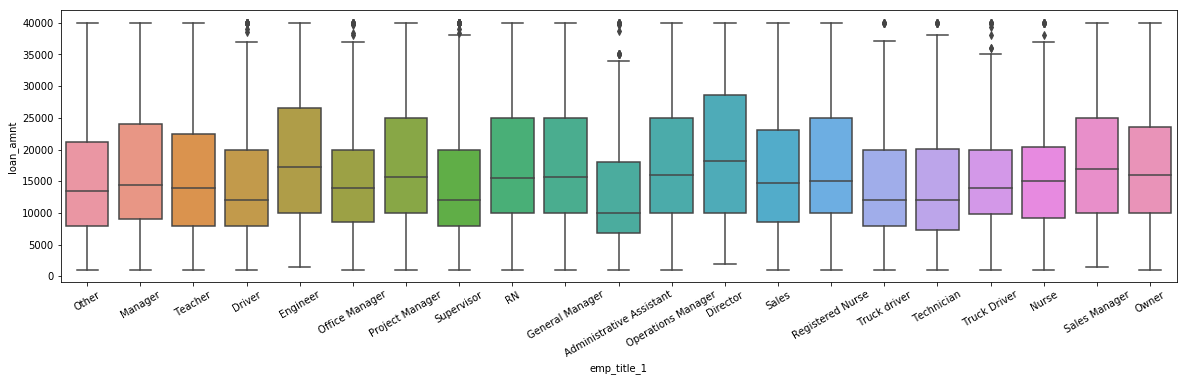

In [63]:
# loan amount by different occupations
plt.figure(figsize=(20, 5))
g = sns.boxplot(x='emp_title_1', y='loan_amnt', data=subset_1)
g.set_xticklabels(g.get_xticklabels(), rotation=30);

In [59]:
# loan amount by different occupations - sorted by median
df = pd.DataFrame({col: vals['loan_amnt'] for col, vals in subset_1.groupby('emp_title_1')})
medians = df.median().sort_values()
print(medians)

Administrative Assistant    10000.0
Technician                  12000.0
Supervisor                  12000.0
Truck driver                12000.0
Driver                      12000.0
Other                       13500.0
Office Manager              14000.0
Teacher                     14000.0
Truck Driver                14000.0
Manager                     14400.0
Sales                       14750.0
Nurse                       15000.0
Registered Nurse            15000.0
RN                          15500.0
General Manager             15600.0
Project Manager             15600.0
Operations Manager          16000.0
Owner                       16000.0
Sales Manager               16900.0
Engineer                    17250.0
Director                    18125.0
dtype: float64


In [80]:
df = df[medians.index]
df.head()

,Administrative Assistant,Technician,Supervisor,Truck driver,Driver,Other,Office Manager,Teacher,Truck Driver,Manager,Sales,Nurse,Registered Nurse,RN,General Manager,Project Manager,Operations Manager,Owner,Sales Manager,Engineer,Director
0,NaN,NaN,NaN,NaN,NaN,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,9600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,4000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


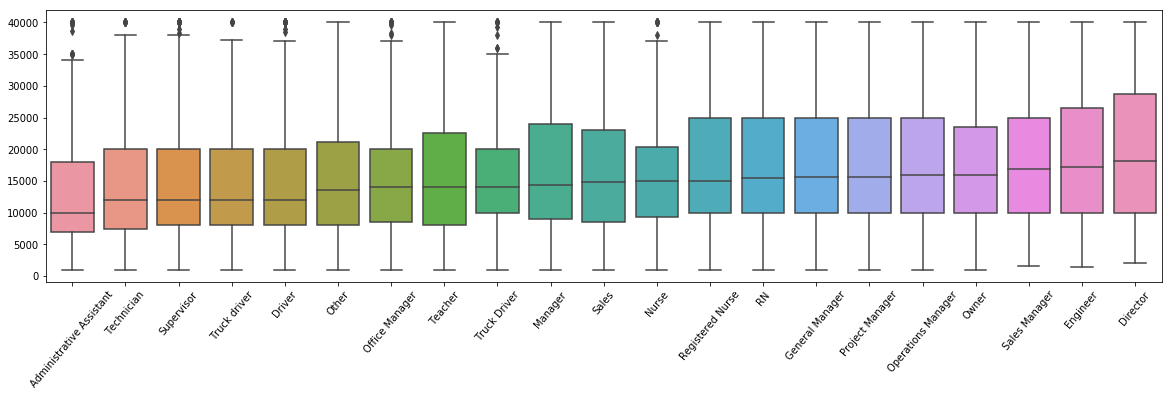

In [86]:
plt.figure(figsize=(20, 5))
g = sns.boxplot(data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=50);

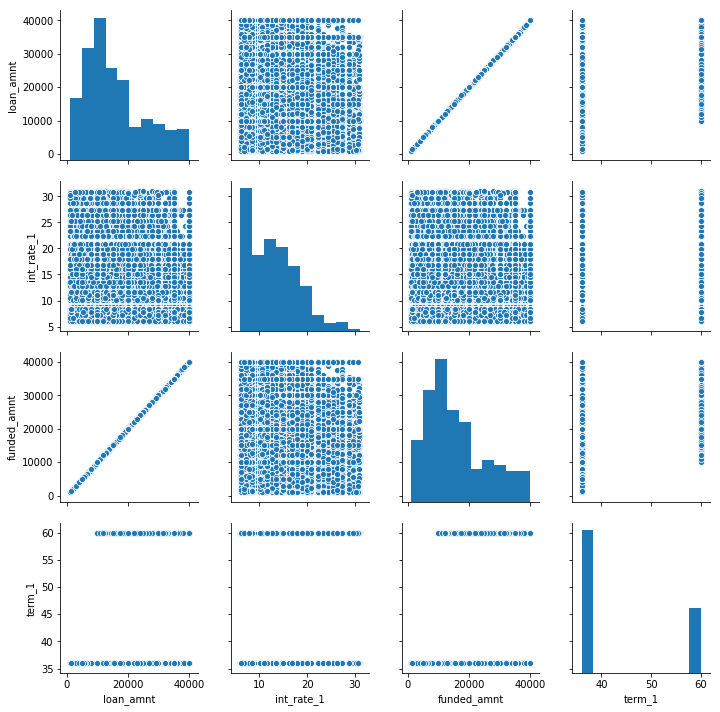

In [29]:
# "loan_amnt" and 'funded_amnt' are obviously correlated.
plt.figure(figsize=(10, 10))
sns.pairplot(subset_1);

In [9]:
bins_loan_amnt = pd.cut(subset_1.loan_amnt, bins=8)
bins_loan_amnt.head()

0     (5875.0, 10750.0]
1     (5875.0, 10750.0]
2       (961.0, 5875.0]
3       (961.0, 5875.0]
4    (25375.0, 30250.0]
Name: loan_amnt, dtype: category
Categories (8, interval[float64]): [(961.0, 5875.0] < (5875.0, 10750.0] < (10750.0, 15625.0] <
                                    (15625.0, 20500.0] < (20500.0, 25375.0] < (25375.0, 30250.0] <
                                    (30250.0, 35125.0] < (35125.0, 40000.0]]

In [10]:
bins_int_rate = pd.cut(subset_1.int_rate_1, bins=6)
bins_int_rate.head()

0    (10.165, 14.33]
1    (10.165, 14.33]
2    (22.66, 26.825]
3    (10.165, 14.33]
4    (18.495, 22.66]
Name: int_rate_1, dtype: category
Categories (6, interval[float64]): [(5.975, 10.165] < (10.165, 14.33] < (14.33, 18.495] <
                                    (18.495, 22.66] < (22.66, 26.825] < (26.825, 30.99]]

In [0]:
# ct = pd.crosstab(bins_int_rate, bins_loan_amnt)
ct = pd.crosstab(bins_int_rate, bins_loan_amnt, normalize='columns')

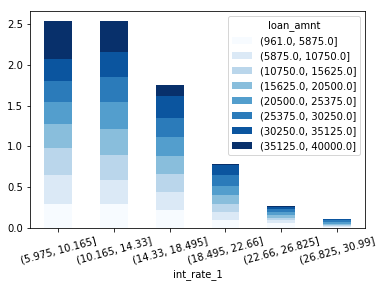

In [37]:
ct.plot(kind='bar', stacked=True, colormap='Blues', rot=15); # the more loan amount, the lower interest rate?

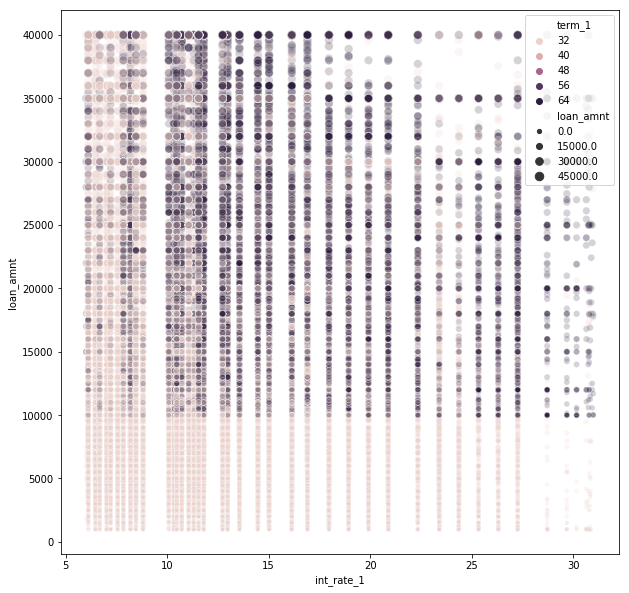

In [30]:
sns.scatterplot(x='int_rate_1', y='loan_amnt', data=subset_1,
                hue='term_1', size='loan_amnt', alpha=0.2);

In [0]:
# ct = pd.crosstab(subset_1.term_1, bins_loan_amnt)
ct = pd.crosstab(subset_1.term_1, bins_loan_amnt, normalize='columns')

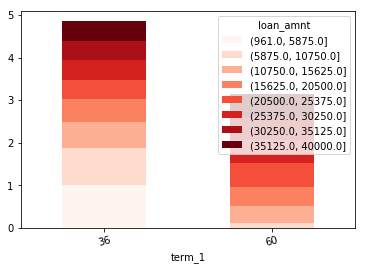

In [35]:
ct.plot(kind='bar', stacked=True, colormap='Reds', rot=15);

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-05-31 01:56:01--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [                <=> ]  21.42M   881KB/s    in 25s     

2019-05-31 01:56:27 (869 KB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22458773]



You can find the file here on Google Drive.  
The path is **content/LoanStats_2018Q4.csv**.

<img src="https://raw.githubusercontent.com/Nov05/Lambda-School-Data-Science/master/pictures/2019-05-30%2014_03_57-LS_DS_124_Make_features.ipynb%20-%20Colaboratory.png" width="300">

In [0]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
# check the file format
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
my_data = pd.read_csv('LoanStats_2018Q4.csv', header=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
my_data.shape

(128414, 144)

In [0]:
my_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,18.0,NaN,14.0,0.0,9082.0,38%,23.0,w,9279.39,9279.39,964.08,964.08,720.61,243.47,0.0,0.0,0.0,Apr-2019,324.23,Apr-2019,Apr-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,671.0,246828.0,1.0,3.0,2.0,3.0,1.0,48552.0,62.0,1.0,3.0,4923.0,46.0,23900.0,2.0,7.0,1.0,7.0,17631.0,11897.0,43.1,0.0,0.0,158.0,275.0,11.0,1.0,1.0,11.0,NaN,11.0,NaN,0.0,3.0,4.0,7.0,7.0,10.0,9.0,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,9600.0,9600.0,9600.0,36 months,12.98%,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,401xx,KY,0.84,0.0,Nov-2003,0.0,69.0,NaN,5.0,0.0,748.0,11.5%,23.0,w,8934.25,8934.25,994.35,994.35,665.75,328.60,0.0,0.0,0.0,Apr-2019,323.37,May-2019,Apr-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,748.0,0.0,0.0,0.0,0.0,44.0,0.0,NaN,0.0,3.0,748.0,12.0,6500.0,0.0,0.0,1.0,3.0,150.0,3452.0,17.8,0.0,0.0,181.0,100.0,13.0,13.0,0.0,16.0,NaN,3.0,NaN,0.0,1.0,1.0,2.0,2.0,16.0,5.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,6500.0,748.0,4200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,Sep-2006,4.0,59.0,NaN,15.

In [0]:
my_data.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [0]:
# check the percentage of NA fields for each column
na_percentage = my_data.isna().sum() / my_data.shape[0]
na_percentage

id                                            0.999984
member_id                                     1.000000
loan_amnt                                     0.000016
funded_amnt                                   0.000016
funded_amnt_inv                               0.000016
term                                          0.000016
int_rate                                      0.000016
installment                                   0.000016
grade                                         0.000016
sub_grade                                     0.000016
emp_title                                     0.163136
emp_length                                    0.091158
home_ownership                                0.000016
annual_inc                                    0.000016
verification_status                           0.000016
issue_d                                       0.000016
loan_status                                   0.000016
pymnt_plan                                    0.000016
url       

In [0]:
# in this case, drop columns with NA value percentage higher than 50%. 
# I don't usually do this. But this is just a practice, drop some columns for better readability.
col_select = na_percentage <= 0.5
col_select.index[col_select] # get column names that I want to keep

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag'],
      dtype='object', length=101)

In [0]:
# drop columns
my_data = my_data[col_select.index[col_select]]
my_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,10000.0,10000.0,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2.0,Jan-1996,0.0,14.0,0.0,9082.0,38%,23.0,w,9279.39,9279.39,964.08,964.08,720.61,243.47,0.0,0.0,0.0,Apr-2019,324.23,Apr-2019,Apr-2019,0.0,1.0,Individual,0.0,671.0,246828.0,1.0,3.0,2.0,3.0,1.0,48552.0,62.0,1.0,3.0,4923.0,46.0,23900.0,2.0,7.0,1.0,7.0,17631.0,11897.0,43.1,0.0,0.0,158.0,275.0,11.0,1.0,1.0,11.0,11.0,0.0,3.0,4.0,7.0,7.0,10.0,9.0,11.0,4.0,14.0,0.0,0.0,0.0,4.0,91.3,28.6,0.0,0.0,367828.0,61364.0,20900.0,54912.0,N,N
1,9600.0,9600.0,9600.0,36 months,12.98%,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-2018,Current,n,home_improvement,Home improvement,401xx,KY,0.84,0.0,Nov-2003,0.0,5.0,0.0,748.0,11.5%,23.0,w,8934.25,8934.25,994.35,994.35,665.75,328.60,0.0,0.0,0.0,Apr-2019,323.37,May-2019,Apr-2019,0.0,1.0,Individual,0.0,0.0,748.0,0.0,0.0,0.0,0.0,44.0,0.0,NaN,0.0,3.0,748.0,12.0,6500.0,0.0,0.0,1.0,3.0,150.0,3452.0,17.8,0.0,0.0,181.0,100.0,13.0,13.0,0.0,16.0,3.0,0.0,1.0,1.0,2.0,2.0,16.0,5.0,7.0,1.0,5.0,0.0,0.0,0.0,0.0,95.5,0.0,0.0,0.0,6500.0,748.0,4200.0,0.0,N,N
2,4000.0,4000.0,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0.0,Sep-2006,4.0,15.0,0.0,5199.0,19.2%,20.0,w,3762.39,3762.39,459.24,459.24,237.61,221.63,0.0,0.0,0.0,Apr-2019,155.68,Apr-2019,Apr-2019,0.0,1.0,Individual,0.0,0.0,66926.0,5.0,4.0,3.0,4.0,5.0,61727.0,86.0,6.0,11.0,1353.0,68.0,27100.0,4.0,0.0,4.0,15.0,4462.0,20174.0,7.9,0.0,0.0,147.0,118.0,2.0,2.0,0.0,2.0,0.0,0.0,5.0,7.0,9.0,9.0,8.0,11.0,12.0,7.0,15.0,0.0,0.0,0.0,9.0,95.0,0.0,0.0,0.0,98655.0,66926.0,21900.0,71555.0,N,N
3,2500.0,2500.0,2500.0,36 months,13.56%,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341.0,10.3%,34.0,w,2328.06,2328.06,251.94,251.94,171.94,80.00,0.0,0.0,0.0,Apr-2019,84.92,Apr-2019,Apr-2019,0.0,1.0,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,N
4,30000.0,30000.0,30000.0,60 months,18.94%,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315.0,24.2%,44.0,w,29074.35,29074.35,2284.34,2284.34,92

In [0]:
# describe non-numeric columns
# my_data.describe(include=['object'])
# or
my_data.describe(exclude=[np.number])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,hardship_flag,debt_settlement_flag
count,128412,128412,128412,128412,107465,116708,128412,128412,128412,128412,128412,128412,128412,128412,128412,128412,128256,128412,128252,122466,128411,128412,128412,128412
unique,2,46,7,35,43892,11,4,3,3,7,2,12,12,880,50,644,1074,2,7,3,9,2,2,2
top,36 months,13.56%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Aug-2006,0%,w,Apr-2019,May-2019,Apr-2019,Individual,N,N
freq,88179,6976,38011,9770,2090,38826,63490,58350,46305,120550,128411,70603,70603,1370,17879,1130,1132,114498,74937,67610,122720,111630,128411,128406


In [0]:
# check non-numeric values: there are whitespaces, NAs
for col, dtype in enumerate(my_data.dtypes):
  if dtype == 'object':
    print(my_data.columns[col])
    print(my_data.iloc[:, col].unique(), '\n')

term
[' 36 months' ' 60 months' nan] 

int_rate
[' 10.33%' ' 12.98%' ' 23.40%' ' 13.56%' ' 18.94%' ' 17.97%' ' 20.89%'
 ' 11.80%' ' 19.92%' ' 26.31%' ' 14.47%' ' 15.02%' ' 16.14%' ' 11.31%'
 ' 27.27%' ' 10.72%' '  6.46%' ' 16.91%' '  8.81%' '  7.56%' ' 22.35%'
 '  8.19%' ' 25.34%' ' 30.75%' '  7.02%' ' 24.37%' ' 30.65%' '  6.00%'
 ' 30.79%' ' 30.84%' ' 28.72%' ' 11.06%' '  7.21%' ' 12.73%' ' 11.55%'
 '  8.46%' ' 29.69%' '  6.11%' '  7.84%' '  6.67%' ' 10.47%' ' 30.17%'
 ' 10.08%' ' 30.94%' ' 30.89%' ' 30.99%' nan] 

grade
['B' 'E' 'C' 'D' 'A' 'F' 'G' nan] 

sub_grade
['B1' 'B5' 'E1' 'C1' 'D2' 'D1' 'D4' 'B4' 'D3' 'E4' 'C2' 'C3' 'C4' 'B3'
 'E5' 'B2' 'A1' 'C5' 'A5' 'A3' 'D5' 'A4' 'E3' 'F5' 'A2' 'E2' 'F4' 'G1'
 'G2' 'F1' 'F2' 'F3' 'G4' 'G3' 'G5' nan] 

emp_title
[nan 'Security' 'Chef' ... 'Oncology Medical Assistant' 'Tax Consultant'
 'Payoff Clerk'] 

emp_length
['< 1 year' nan '3 years' '10+ years' '6 years' '5 years' '2 years'
 '9 years' '1 year' '7 years' '8 years' '4 years'] 

home_ow

In [0]:
# trim whitespaces for all non-numeric columns
my_data = my_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

### Covert column 'term'

In [0]:
my_data['term'].head()

0    36 months
1    36 months
2    36 months
3    36 months
4    60 months
Name: term, dtype: object

In [0]:
type(my_data['term'][0])

str

In [0]:
# AttributeError: 'float' object has no attribute 'strip'
# my_data['term_1'] = my_data['term'].apply(lambda x: x.strip(' months')) # this error is caused by NA values
my_data['term_1'] = my_data['term'].astype(str).apply(lambda x: x.strip(' months')) # if do so, then we will need deal with "NaN" strings
my_data['term_1'].head()

0    36
1    36
2    36
3    36
4    60
Name: term_1, dtype: object

In [0]:
# instead we could first replace the NA values with some string
tmp = my_data['term'].fillna('0 months')
tmp[tmp =='0 months']

128412    0 months
128413    0 months
Name: term, dtype: object

In [0]:
# fill NAs and strip
my_data['term_1'] = my_data['term'].fillna('0 months').apply(lambda x: x.strip(' months'))
my_data['term_1'].head()

0    36
1    36
2    36
3    36
4    60
Name: term_1, dtype: object

In [0]:
# check result
my_data[my_data['term_1']=='0']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,term_1
128412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
128413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
# there are only 2 different types of value, 36 months and 60 months (now 0 months), so we are going to convert the type from 'str' to 'int'
my_data['term_1'] = my_data['term'].fillna('0 months').apply(lambda x: x.strip(' months')).astype('int')
my_data[my_data['term_1']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,term_1
128412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
128413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

Apply the function to the `int_rate` column

In [0]:
# fill NAs and strip
my_data['int_rate_1'] = my_data['int_rate'].fillna('0%').apply(lambda x: x.strip('%')).astype('float')
my_data['int_rate_1'].head()

0    10.33
1    12.98
2    23.40
3    13.56
4    18.94
Name: int_rate_1, dtype: float64

In [0]:
my_data[my_data['int_rate_1']==0].head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,term_1,int_rate_1
128412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
128413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


### Clean `emp_title`

Look at top 20 titles

In [0]:
my_data['emp_title'].head()

0           NaN
1           NaN
2      Security
3          Chef
4    Postmaster
Name: emp_title, dtype: object

How often is `emp_title` null?

In [0]:
# 0.163136 = 16% of its fields are null.

Clean the title and handle missing values

In [0]:
# fill NAs and strip
my_data['emp_title_1'] = my_data['emp_title'].fillna('Unknown').apply(lambda x: x.title())
my_data['emp_title_1'].head()

0       Unknown
1       Unknown
2      Security
3          Chef
4    Postmaster
Name: emp_title_1, dtype: object

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
# list 20 unique values of this column
[t for t in my_data['emp_title_1'].unique()][:20]

['Unknown',
 'Security',
 'Chef',
 'Postmaster',
 'Administrative',
 'Operator',
 'Manager',
 'Nursing Supervisor',
 'Material Handler',
 'Instructional Coordinator',
 'Financial Relationship Associate',
 'Sale Representative',
 'Driver Coordinator',
 'Gas Attendant',
 'Assistant Athletic Director Of Marketing',
 'Sr Sales Manager',
 'Casino Host',
 'Carpenter',
 'Maintenance Planner',
 'Firefighter/Captain']

In [0]:
my_data['emp_title_manager'] = my_data['emp_title_1'].str.contains('manager', case=False, regex=False).astype(int)
my_data['emp_title_manager'].head()

0    0
1    0
2    0
3    0
4    0
Name: emp_title_manager, dtype: int64

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
my_data['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [0]:
print(datetime.today().day)

31


In [0]:
# check NAs
my_data['issue_d'].isna().sum()

2

In [0]:
# test run
my_data['issue_d'].head().apply(lambda x: datetime.strptime(x, '%b-%Y'))

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [0]:
my_data['issue_d_1'] = my_data['issue_d'].fillna('Jan-1970').apply(lambda x: datetime.strptime(x, '%b-%Y'))
my_data['issue_d_1'].head()

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d_1, dtype: datetime64[ns]

In [0]:
# Those two rows are missing a lot of fields. 
# Given that the dataset has large number of rows, 
# I think we can simply drop those two rows.
my_data[my_data['issue_d_1']=='1970-01-01']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,term_1,int_rate_1,emp_title_1,emp_title_manager,issue_d_1
128412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Unknown,0,1970-01-01
128413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,Unknown,0,1970-01-01


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
# 'term' column has been processed in previous code blocks.

In [0]:
# Make a column named loan_status_is_great. It should contain the integer 1 if loan_status is "Current" or "Fully Paid." Else it should contain the integer 0.
my_data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (16-30 days)', 'Late (31-120 days)',
       'In Grace Period', 'Charged Off', 'Default', nan], dtype=object)

In [0]:
my_data['load_status_is_great'] = my_data['loan_status'].fillna('Unknown').str.contains('current|fully paid', flags=re.IGNORECASE, regex=True)
my_data['load_status_is_great'].head()

0    True
1    True
2    True
3    True
4    True
Name: load_status_is_great, dtype: bool

In [0]:
# verify result
my_data[my_data['load_status_is_great']==True][['load_status_is_great', 'loan_status']].head()

,load_status_is_great,loan_status
0,True,Current
1,True,Current
2,True,Current
3,True,Current
4,True,Current


In [0]:
# verify result
my_data[my_data['load_status_is_great']==False][['load_status_is_great', 'loan_status']].head()

,load_status_is_great,loan_status
70,False,Late (16-30 days)
164,False,Late (16-30 days)
185,False,Late (16-30 days)
256,False,Late (16-30 days)
369,False,Late (16-30 days)


In [0]:
# Make last_pymnt_d_month and last_pymnt_d_year columns.
my_data['last_pymnt_d'].head()

0    Apr-2019
1    Apr-2019
2    Apr-2019
3    Apr-2019
4    Apr-2019
Name: last_pymnt_d, dtype: object

In [0]:
# test run: create dictionary
month_dict = dict((v, k) for (k, v) in enumerate(calendar.month_abbr))
print(month_dict)

{'': 0, 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}


In [0]:
print(month_dict['Apr'])

4


In [0]:
df = my_data['last_pymnt_d'].fillna('-0').str.split('-', n=1, expand=True)
df.head()

,0,1
0,Apr,2019
1,Apr,2019
2,Apr,2019
3,Apr,2019
4,Apr,2019


In [0]:
my_data['last_pymnt_d_month'] = df[0].apply(lambda x: month_dict[x])

In [0]:
my_data['last_pymnt_d_year'] = df[1].astype('int')

In [0]:
# verfiy result
my_data[my_data['last_pymnt_d'].isna()][['last_pymnt_d_month', 'last_pymnt_d_year']].head()

,last_pymnt_d_month,last_pymnt_d_year
1617,0,0
2927,0,0
3140,0,0
3266,0,0
3547,0,0


In [31]:
my_data['last_pymnt_d'].value_counts().head()

Apr-2019    74937
Mar-2019    47723
Feb-2019     2040
Jan-2019     1582
Dec-2018     1057
Name: last_pymnt_d, dtype: int64

In [32]:
# verfiy result
my_data[my_data['last_pymnt_d']=='Mar-2019'][['last_pymnt_d_month', 'last_pymnt_d_year']].head()

,last_pymnt_d_month,last_pymnt_d_year
53,3,2019
59,3,2019
73,3,2019
79,3,2019
81,3,2019


In [0]:
# # save the data frame to .csv file on Google drive
# filepath = 'drive/My Drive/data/LoanStats_2018Q4_dropped.csv'
# my_data.to_csv(filepath)

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [0]:
# There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.

my_data['revol_util_1'] = my_data['revol_util'].fillna('0%').str.strip('%').astype('float')
my_data['revol_util_1'].head()

0    38.0
1    11.5
2    19.2
3    10.3
4    24.2
Name: revol_util_1, dtype: float64

In [0]:
# validate conversion
my_data[my_data['revol_util'].isna()]['revol_util_1'].head()

234     0.0
5275    0.0
5541    0.0
6104    0.0
6745    0.0
Name: revol_util_1, dtype: float64

In [0]:
# Modify the emp_title column to replace titles with 'Other' if the title is not in the top 20.
s = my_data['emp_title'].value_counts().head(20)
s

Teacher                     2267
Manager                     2022
Registered Nurse            1054
Driver                      1016
Supervisor                   970
RN                           749
Sales                        637
General Manager              583
Project Manager              572
Office Manager               569
Director                     484
Owner                        467
Truck Driver                 434
Operations Manager           431
Engineer                     366
Nurse                        355
Technician                   352
Administrative Assistant     346
Sales Manager                338
Truck driver                 327
Name: emp_title, dtype: int64

In [0]:
my_data['emp_title_1'] = my_data['emp_title'].apply(lambda x: x if x in s else 'Other')

In [0]:
# Verify result
my_data[my_data['emp_title'] == 'Teacher'][['emp_title_1', 'emp_title']].head()

,emp_title_1,emp_title
39,Teacher,Teacher
44,Teacher,Teacher
61,Teacher,Teacher
99,Teacher,Teacher
101,Teacher,Teacher


In [0]:
s_tail = my_data['emp_title'].value_counts().tail(3)
s_tail

Manager, Professional Liability    1
Administrative service             1
Machine service tech               1
Name: emp_title, dtype: int64

In [0]:
s_tail.index[0]

'Manager, Professional Liability'

In [0]:
# Verify result
my_data[my_data['emp_title'] == s_tail.index[0]][['emp_title_1', 'emp_title']].head()

,emp_title_1,emp_title
3894,Other,"Manager, Professional Liability"


In [0]:
my_data['emp_title'].tail(1)

128413    NaN
Name: emp_title, dtype: object

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-05-31 02:32:04--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.106.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.106.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  67.2MB/s    in 2.9s    

2019-05-31 02:32:08 (67.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
aisles_data = pd.read_csv('../instacart_2017_05_01/aisles.csv')

In [0]:
aisles_data.shape # thank goodness it is small

(134, 2)

In [0]:
aisles_data.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
aisles_data.isnull().sum() # thank goodness it is "clean"

aisle_id    0
aisle       0
dtype: int64

In [0]:
aisles_data['aisle'].value_counts()

buns rolls                       1
packaged vegetables fruits       1
spreads                          1
fresh pasta                      1
baby accessories                 1
spices seasonings                1
fresh dips tapenades             1
body lotions soap                1
packaged poultry                 1
lunch meat                       1
white wines                      1
canned jarred vegetables         1
fresh herbs                      1
baking supplies decor            1
oral hygiene                     1
pasta sauce                      1
salad dressing toppings          1
ice cream toppings               1
cold flu allergy                 1
vitamins supplements             1
shave needs                      1
refrigerated pudding desserts    1
hot dogs bacon sausage           1
instant foods                    1
eye ear care                     1
cleaning products                1
energy sports drinks             1
latino foods                     1
deodorants          